In [1]:
import GPflow

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

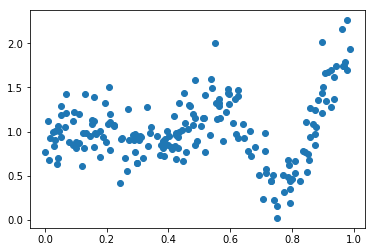

In [2]:
n = 200
x = np.sort(np.random.rand(n))
z = np.linspace(-0.2, 1.2, 100)[:,None]
y = 1 + x*x * np.sin(2 * np.pi * 2.3 * x) + 0.2 * np.random.randn(n)

plt.plot(x, y, 'o');
x = x[:,None]
y = y[:,None]

xu = np.linspace(0,1,6)[:,None]

In [3]:
mu = GPflow.mean_functions.Linear(1, 2)
k = GPflow.kernels.RBF(1, variance=0.2, lengthscales=0.2)
m = GPflow.sgpr.GPRFITC(x, y, mean_function=mu, kern=k,  Z=xu)
m.likelihood.variance = 0.2
m.Z.fixed = True
m.optimize();
m

Name,values,prior,constraint
model.mean_function.b,[ 0.77029176],None,(none)
model.mean_function.A,[[ 0.3961324]],None,(none)
model.kern.variance,[ 0.29103682],None,+ve
model.kern.lengthscales,[ 0.12966117],None,+ve
model.likelihood.variance,[ 0.02910646],None,+ve
model.Z,[[ 0. ] [ 0.2] [ 0.4] [ 0.6] [ 0.8] [ 1. ]],None,[FIXED]


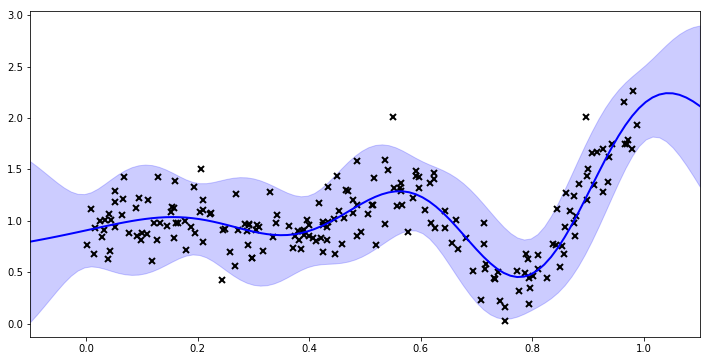

In [4]:
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-0.1, 1.1)

plot(m)

In [8]:
import sys
sys.path.insert(0, "/home/bill/pymc3/")
import pymc3 as pm

with pm.Model() as model:
    l = pm.Uniform("l", lower=0.01, upper=1)
    sf2 = 0.195
    sn2 = 0.05
    cov = sf2 * pm.gp.cov.ExpQuad(1, l)
    mu  = pm.gp.mean.Linear(intercept=0.88, coeffs=0.55) 
    yobs = pm.gp.gp.GPfitc("yobs", mean_func=mu, cov_func=cov, X=x, Xu=xu, sigma=sn2, observed=y.flatten())

with model:
    trace = pm.sample(500)
    
#model.logp()

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -1.1452:   7%|▋         | 13700/200000 [04:58<50:45, 61.18it/s]    
Convergence archived at 13700
Interrupted at 13,700 [6%]: Average Loss = 33.599
100%|██████████| 1000/1000 [01:27<00:00, 11.38it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c7a97f710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8c7a91d5c0>]], dtype=object)

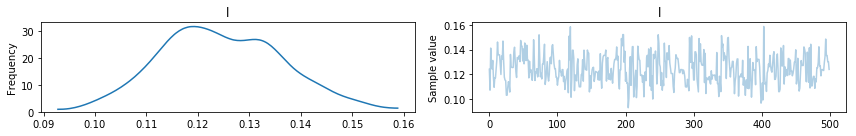

In [9]:
pm.traceplot(trace)